# Случайный лес

В этом практическом задании вы решите задачу регрессии на реальных данных при помощи линейной модели и случайного леса. 

## Цели практической работы

* Научиться применять случайный лес в задаче регрессии.
* Научиться сравнивать качество случайного леса с качеством линейной модели.
* Научиться настраивать гиперпараметры леса.

## Что входит в работу

* Выполнить предобработку данных.
* Обучить линейную регрессию на данных задачи.
* Обучить случайный лес на данных задачи.
* Подобрать гиперпараметры для леса.
* Визуализировать важность признаков у леса.

## Что оценивается

*  Все ячейки заполнены; при запуске ячеек  Python не выдаёт информацию об ошибках.
*  Качество итоговой модели $R^2$ превышает 0,95.


## Что нужно сделать

Постройте модели, предсказывающие стоимость автомобилей по характеристикам.

Признаков у машин много, но в этой работе обойдёмся только числовыми признаками:
*  year — год производства автомобиля;
*  km_driven — пробег;
*  seats — количество посадочных мест;
*  mileage — другая характеристика пробега;
*  engine — мощность двигателя;
*  max_power — мощность автомобиля.

Целевая переменная — selling_price.

In [36]:
import pandas as pd
import numpy as np

train = pd.read_csv("cars_train.csv")
test = pd.read_csv("cars_test.csv")

Создайте объекты Xtrain, ytrain, Xtest, ytest. Запишите в них матрицы «объект — признак» и векторы целевой переменной для тренировочного и тестового датасетов.

In [37]:
x_train, y_train = train.drop('selling_price', axis=1), train['selling_price']
x_test, y_test = test.drop('selling_price', axis=1), test['selling_price']

В тренировочных данных есть автомобили, для которых неизвестна стоимость. Удалите эти автомобили из трейна.

In [38]:
x_train = x_train[~y_train.isna()]
y_train = y_train.dropna()

Перед обучением моделей обработайте данные.

Обратите внимание, что столбцы mileage, engine и max_power по смыслу числовые. Чтобы превратить их в числовые столбцы, отбросьте единицы измерения и оставьте только числа. В столбцах есть пропущенные значения, их при обработке трогать не нужно.

In [39]:
for col in ['mileage', 'engine', 'max_power']:
    x_train[col] = x_train[col].apply(lambda x: float(x.split(' ')[0]) if isinstance(x, str) else x)
    x_test[col] = x_test[col].apply(lambda x: float(x.split(' ')[0]) if isinstance(x, str) else x)

x_train[['mileage', 'engine', 'max_power']]

,mileage,engine,max_power
0,23.40,1248.0,74.00
1,21.14,1498.0,103.52
2,23.00,1396.0,90.00
4,20.14,1197.0,81.86
6,16.10,796.0,37.00
...,...,...,...
6992,18.90,998.0,67.10
6993,18.50,1197.0,82.85
6995,19.30,1248.0,73.90
6996,23.57,1396.0,70.00


Оставьте в данных только шесть числовых столбцов:

year, km_driven, seats, engine, mileage, max_power

In [40]:
x_train = x_train[['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']]
x_test = x_test[['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power']]

Теперь заполните пропуски следующим образом:

*    вычислите средние значения по столбцам тренировочной выборки;

*    добавьте в пропуски в тренировочных и тестовых данных вычисленные средние.

In [41]:
for col in x_train:
    mn = x_train[col].mean()
    x_train[col] = x_train[col].fillna(mn)
    x_test[col] = x_test[col].fillna(mn)


Теперь на обработанных тренировочных данных обучите:

*  линейную регрессию,
*  случайный лес с параметрами по умолчанию.

На обработанных тестовых данных сделайте предсказание и вычислите метрику $R^2$. 

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lnr = LinearRegression()
rfr = RandomForestRegressor()

lnr.fit(x_train, y_train)
rfr.fit(x_train, y_train)

lnr_pred = lnr.predict(x_test)
rfr_pred = rfr.predict(x_test)
r2_score(y_test, lnr_pred), r2_score(y_test, rfr_pred)

(0.6485839251280118, 0.9651314183539313)

Какая модель получилась лучше?

Лучше показала себя модел случайного леса

Улучшите качество предсказания случайного леса путём подбора гиперпараметров:

*   n_estimators,
*   max_depth,
*   max_features,
*   min_samples_leaf,
*   min_samples_split.

Для подбора гиперпараметров используйте GridSearchCV. Обучайте GridSearchCV по тренировочным данным с разбивкой на три фолда и метрикой $R^2$.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV


rfr = RandomForestRegressor(n_jobs=-1)

params = {
    'n_estimators': list(range(25, 150, 25)),
    'max_depth': list(range(8, 33, 8)),
    'max_features': ['sqrt', 'log2'] + list(range(3, 11)),
    'min_samples_leaf': list(range(1, 5)),
    'min_samples_split': list(range(2, 9, 2)),
}

gs = GridSearchCV(
    rfr, 
    param_grid=params, 
    scoring=make_scorer(r2_score),
    cv=3, 
    n_jobs=-1
)

gs.fit(x_train, y_train)
gs.best_params_, gs.best_score_

({'max_features': 8, 'min_samples_split': 4, 'n_estimators': 50},
 0.9554153941394055)

Теперь обучите на тренировочных данных случайный лес с найденными гиперпараметрами. Сделайте предсказание на тестовых данных и оцените его качество ($R^2$).

In [46]:
# {'max_depth': 16, 'max_features': 8, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}
rfr = RandomForestRegressor(**{'max_depth': 16, 'max_features': 8, 'min_samples_leaf': 1, 
                               'min_samples_split': 4, 'n_estimators': 50}, n_jobs=-1)
rfr.fit(x_train, y_train)

y_pred = rfr.predict(x_test)
r2_score(y_test, y_pred)

0.9635463346030746

Модель готова. Осталось её проинтерпретировать.

При помощи метода model.feature_importances_ визуализируйте гистограмму важности признаков у случайного леса с настроенными гиперпараметрами.

In [49]:
rfr.feature_names_in_

array(['year', 'km_driven', 'seats', 'engine', 'mileage', 'max_power'],
      dtype=object)

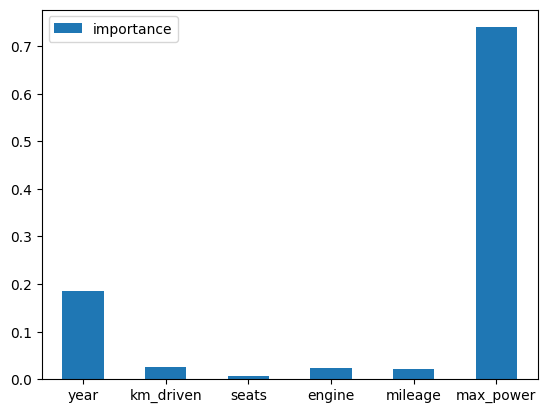

In [60]:
import matplotlib.pyplot as plt


pd.DataFrame(rfr.feature_importances_.reshape((6, 1)), index=rfr.feature_names_in_, columns=['importance']).plot.bar()
plt.xticks(rotation=0);